<a href="https://colab.research.google.com/github/bgohrani/ML_Projects/blob/main/SVMs_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier


import tensorflow as tf
import keras

#Importing essential Libraries

# 1. Support Vector Machines

In [ ]:
iris_data = sklearn.datasets.load_iris()

#Loading the Iris Dataset from Sklearn for training 

In [ ]:
X_train = iris_data['data'][:,(2,3)]
Y_train = (iris_data.target == 2).astype('uint8')

#We want to create a binary classification problem and so select two features and create binary labels

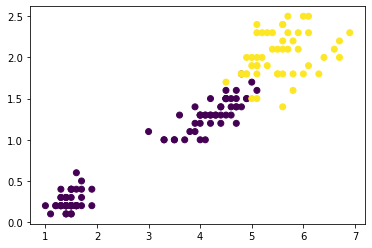

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.show()

#Visualizing our data

In [ ]:
svm_classifier = Pipeline([
                           ('scaler', StandardScaler()),
                           ('linear_svc', LinearSVC(C=1, loss="hinge"))
])
svm_classifier.fit(X_train, Y_train)

#Creating a pipeline that scales the features and trains the Linear SVC model to fit the data

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

#We want to visualize the results with the scaled data

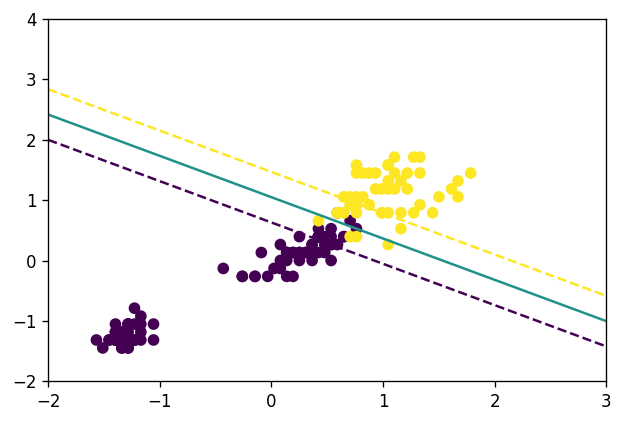

In [ ]:
X = np.linspace(-2,3,100)
Y = np.linspace(-2,4,100)
XX, YY = np.meshgrid(X,Y)
boundary_X = np.c_[XX.reshape(-1,1),YY.reshape(-1,1)]
boundary_result = svm_classifier.named_steps['linear_svc'].decision_function(boundary_X)
plt.figure(dpi=120)
plt.contour(XX,YY,boundary_result.reshape(100,100), levels=[-1,0,1], linestyles=['--','-','--'])
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=Y_train)
plt.show()

In [ ]:
moons_data,moons_target = sklearn.datasets.make_moons(noise=0.08, n_samples = 500)

#Generating non-linear moons data with some noise for training

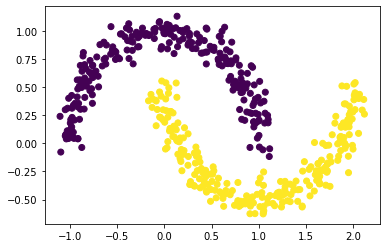

In [ ]:
plt.scatter(moons_data[:,0], moons_data[:,1], c=moons_target)
plt.show()

#Visualizing moons data

In [ ]:
polynomial_svm_clf = Pipeline([
                               ('poly_features', PolynomialFeatures(degree=3)),
                               ('scaler', StandardScaler()),
                               ('svm_clf', LinearSVC(C=1, loss='hinge'))
])
polynomial_svm_clf.fit(moons_data,moons_target)

#Creating a pipeline that creates additional non-linear features upto degree 3, scales the data and then fits the data to the Linear SVC model

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, loss='hinge'))])

In [ ]:
X_values = np.linspace(-3,3,1000)
Y_values = np.linspace(-1.5,1.5,1000)
XX,YY = np.meshgrid(X_values,Y_values)

#We want to create a contour plot to clearly visualize the decision boundary and so use np.meshgrid to get all the values in a 2x2 area

In [ ]:
contour_X = np.c_[XX.reshape(-1),YY.reshape(-1)]
contour_result = polynomial_svm_clf.predict(contour_X)

#We flatten these values out and pass it to the trained model
#The result is then reshaped to form the 2x2 grid and plotted with XX and YY

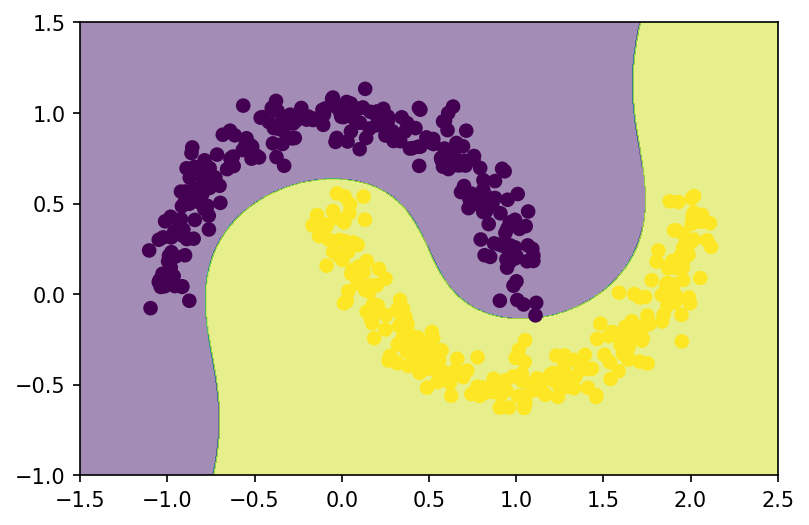

In [ ]:
plt.figure(dpi=150)
plt.contourf(XX,YY,contour_result.reshape(1000,1000),alpha=0.5)
plt.scatter(moons_data[:,0],moons_data[:,1],c=moons_target)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.show()

#We can visualize the contour plot and the boundary with the help of the following code

In [ ]:
polynomial_svm_kernel = Pipeline([
                               ('scaler', StandardScaler()),
                               ('svm_clf', SVC(kernel='poly',degree=3,C=1))
])
polynomial_svm_kernel.fit(moons_data,moons_target)

#We can also acheive the same result by utilizing the SVC class and its polynomial kernel, it is much faster

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, kernel='poly'))])

In [ ]:
svm_similarity_kernel_lowC_lowG = Pipeline([
                                  ('scaler', StandardScaler()),
                                  ('svm_clf', SVC(kernel = 'rbf', gamma=0.1, C=0.01))
])
svm_similarity_kernel_highC_lowG = Pipeline([
                                  ('scaler', StandardScaler()),
                                  ('svm_clf', SVC(kernel = 'rbf', gamma=0.1, C=1000))
])
svm_similarity_kernel_highC_highG = Pipeline([
                                  ('scaler', StandardScaler()),
                                  ('svm_clf', SVC(kernel = 'rbf', gamma=5, C=1000))
])
svm_similarity_kernel_lowC_highG = Pipeline([
                                  ('scaler', StandardScaler()),
                                  ('svm_clf', SVC(kernel = 'rbf', gamma=5, C=0.01))
])

#To tackle non-linear datasets, we can also add similarity features that determine relationships between instances and landmarks
#One is the Gaussian Radial Basis function, or RBF kernel, a bell shaped function we can use to create new features

In [ ]:
svm_similarity_kernel_lowC_lowG.fit(moons_data, moons_target)
contour_result_lowC_lowG = svm_similarity_kernel_lowC_lowG.predict(contour_X)

svm_similarity_kernel_highC_lowG.fit(moons_data, moons_target)
contour_result_highC_lowG = svm_similarity_kernel_highC_lowG.predict(contour_X)

svm_similarity_kernel_highC_highG.fit(moons_data, moons_target)
contour_result_highC_highG = svm_similarity_kernel_highC_highG.predict(contour_X)

svm_similarity_kernel_lowC_highG.fit(moons_data, moons_target)
contour_result_lowC_highG = svm_similarity_kernel_lowC_highG.predict(contour_X)

#The RBF kernel  has two important hyperparamters, Gamma and C and we wish to see their effect on fitting the data
#We take 4 combinations, lowC lowG, highC lowG, highC highG, and lowC highG
#Thus we create 4 different models

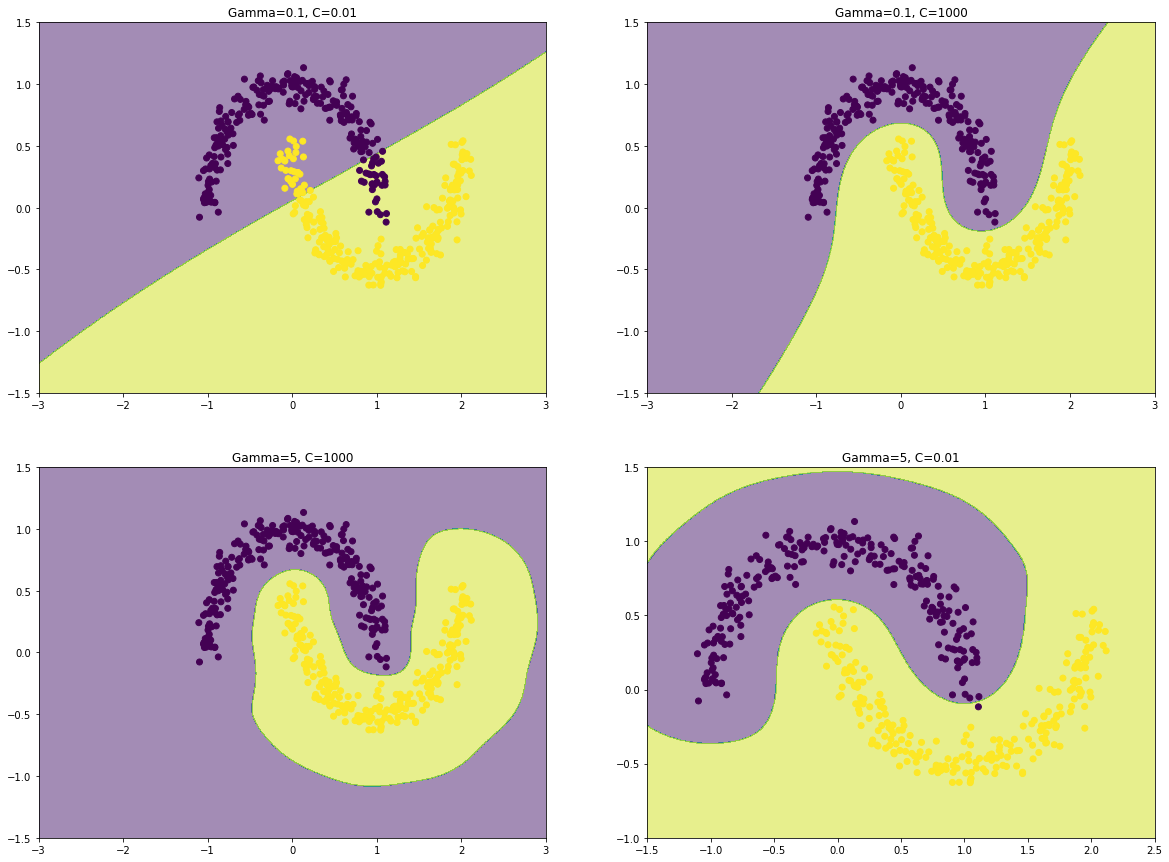

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.contourf(XX,YY,contour_result_lowC_lowG.reshape(1000,1000),alpha=0.5)
plt.scatter(moons_data[:,0],moons_data[:,1],c=moons_target)
plt.title('Gamma=0.1, C=0.01')

plt.subplot(2,2,2)
plt.contourf(XX,YY,contour_result_highC_lowG.reshape(1000,1000),alpha=0.5)
plt.scatter(moons_data[:,0],moons_data[:,1],c=moons_target)
plt.title('Gamma=0.1, C=1000')

plt.subplot(2,2,3)
plt.contourf(XX,YY,contour_result_highC_highG.reshape(1000,1000),alpha=0.5)
plt.scatter(moons_data[:,0],moons_data[:,1],c=moons_target)
plt.title('Gamma=5, C=1000')

plt.subplot(2,2,4)
plt.contourf(XX,YY,contour_result_lowC_highG.reshape(1000,1000),alpha=0.5)
plt.scatter(moons_data[:,0],moons_data[:,1],c=moons_target)
plt.title('Gamma=5, C=0.01')

plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.show()

#We take 4 subplots to visualize this effect, and create contours in the backgroud to view the decision boundary carefully
#We can make the following observations here
#Increasing C makes the decision boundary more resistant to violations whereas reducing it allows for some relaxation
#Gamma influences the range of the instances, increasing it makes the decision boundary irregular and each instance range of influence is smaller
#Reducing gamma acts like a regularization parameter, the bell shaped curve becomes wider and the decision boundary is smoother 

# 2. Decision Trees

In [ ]:
iris_data = sklearn.datasets.load_iris()
X_train = iris_data['data'][:,2:]
Y_train = iris_data.target

#Loading Iris Dataset

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)

#Creating a decision tree classifier

In [ ]:
tree_clf.fit(X_train,Y_train)

#Training the classifier on the given data

DecisionTreeClassifier(max_depth=2)

In [ ]:
export_graphviz(
    tree_clf,
    out_file = 'iris.dot',
    feature_names = iris_data.feature_names[2:],
    class_names = iris_data.target_names,
    rounded=True,
    filled= True
)

! dot -Tpng iris.dot -o iris.jpg


#Here we use export graphviz to export the diagram of the decision tree that allows us to view how the model has fit to the data
#The dot file is then converted to png

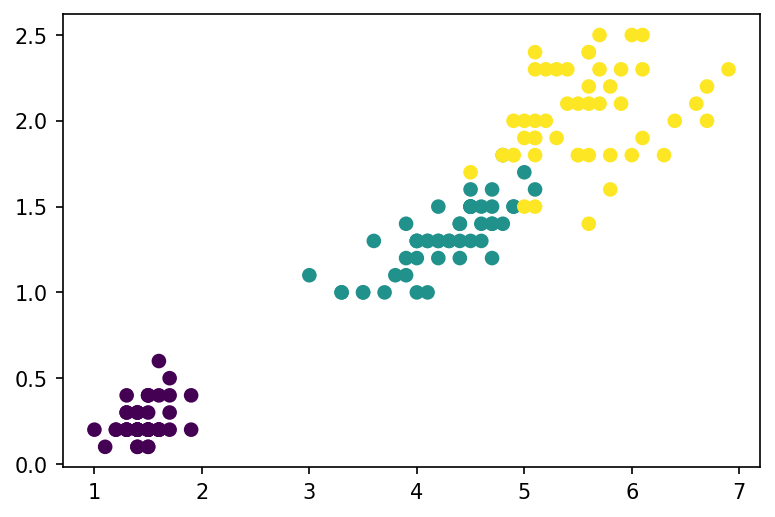

In [ ]:
plt.figure(dpi=150)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.show()

#Visualizing our data

In [ ]:
X_values = np.linspace(0,7,1000)
Y_values = np.linspace(0,2.5,1000)
XX,YY = np.meshgrid(X_values,Y_values)

#Creating contour plots to see how classification has been done by our model

In [ ]:
contour_X = np.c_[XX.reshape(-1),YY.reshape(-1)]
contour_result = tree_clf.predict(contour_X)

#We have the 2D grid and then flatten it out to send to our classifier
#The result is then reshaped to the original 2D size and contour plot is created

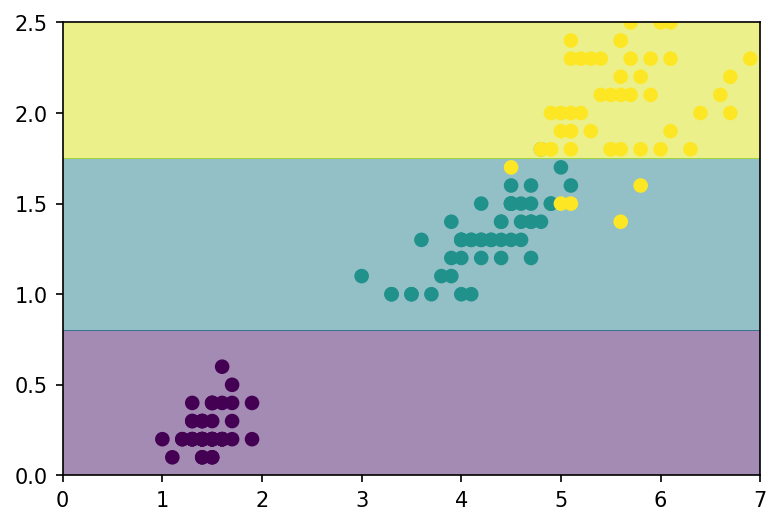

In [ ]:
plt.figure(dpi=150)
plt.contourf(XX,YY,contour_result.reshape(1000,1000),alpha=0.5)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlim(0,7)
plt.ylim(0,2.5)
plt.show()

#Plotting the contours and the data given

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf_rest = DecisionTreeClassifier(min_samples_leaf=6)

#We want to build a tree classifier for the moons dataset 
#min_samples_leaf sets a criterion for branching the tree
#We want to see how adding restrictions affects classification

In [ ]:
X_values = np.linspace(-3,3,1000)
Y_values = np.linspace(-1.5,1.5,1000)
XX,YY = np.meshgrid(X_values,Y_values)

#Creating required data for contour plot visualization

In [ ]:
contour_X = np.c_[XX.reshape(-1),YY.reshape(-1)]

In [ ]:
tree_clf.fit(moons_data,moons_target)
unrestricted_predictions = tree_clf.predict(contour_X)

tree_clf_rest.fit(moons_data,moons_target)
restricted_predictions = tree_clf_rest.predict(contour_X)

#We fit both the models to the training data and make predictions

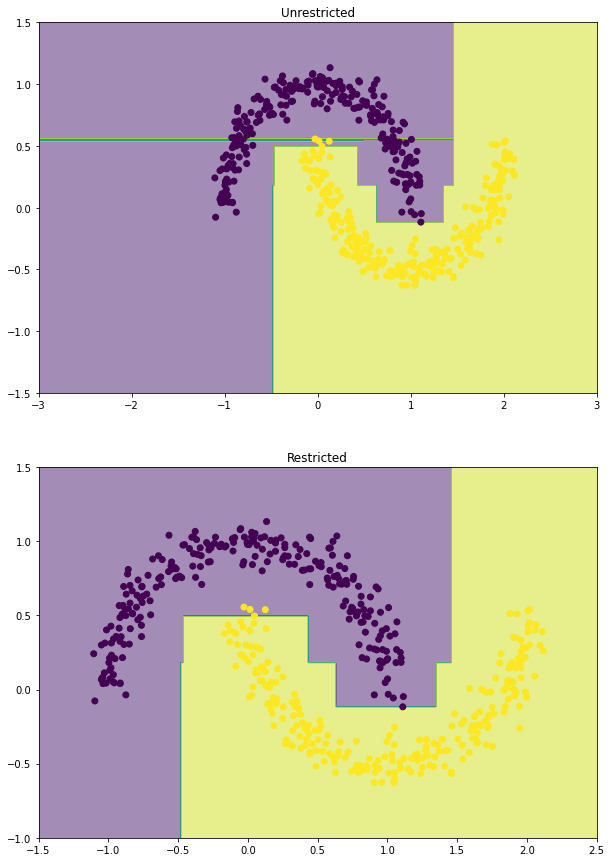

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
plt.contourf(XX,YY,unrestricted_predictions.reshape(1000,1000),alpha=0.5)
plt.scatter(moons_data[:,0],moons_data[:,1],c=moons_target)
plt.title('Unrestricted')

plt.subplot(2,1,2)
plt.contourf(XX,YY,restricted_predictions.reshape(1000,1000),alpha=0.5)
plt.scatter(moons_data[:,0],moons_data[:,1],c=moons_target)
plt.title('Restricted')

plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.show()

#We plot the predictions and decision boundaries of both the models
#The unrestricted model ensures that the boundary is rigid and violations are none however the restricted model allows for some violations to preserve the shape
#The restricted model generalizes better and is in fact regularized

In [ ]:
X_train = np.linspace(0,4,500)
Y_train_clean = (X_train-2)**2
noise = np.random.random(500) - 0.5
Y_train = Y_train_clean + noise

#Creating some noisy non-linear quadratic data

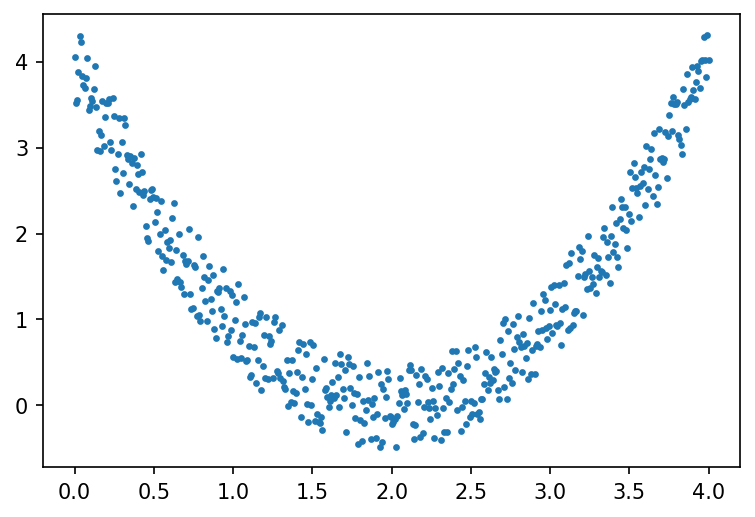

In [ ]:
plt.figure(dpi=150)
plt.scatter(X_train,Y_train,s=5)
plt.show()

#Visualizing data

In [ ]:
tree_clf_reg = DecisionTreeRegressor(max_depth=2)
tree_clf_reg.fit(X_train.reshape(-1,1),Y_train)
tree_reg_pred = tree_clf_reg.predict(X_train.reshape(-1,1))

tree_clf_unconstrained_reg = DecisionTreeRegressor()
tree_clf_unconstrained_reg.fit(X_train.reshape(-1,1),Y_train)
tree_clf_unconstrained_reg_pred = tree_clf_unconstrained_reg.predict(X_train.reshape(-1,1))

#We create 2 decision tree regressors, one with a max_depth restriction and the other without any restrictions
#We wish to observe underfitting and overfitting of the data

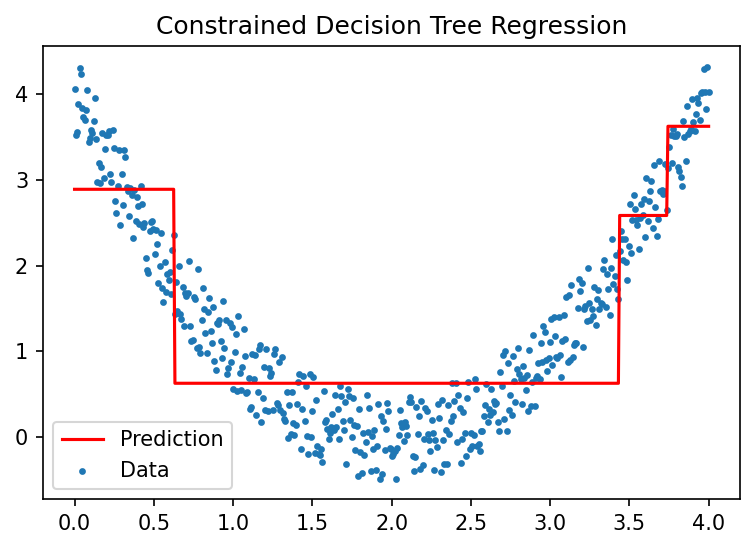

In [ ]:
plt.figure(dpi=150)
plt.scatter(X_train,Y_train,s=5)
plt.plot(X_train,tree_reg_pred,'r')
plt.legend(['Prediction','Data'])
plt.title('Constrained Decision Tree Regression')
plt.show()

#Plotting the predicitions of both the trees

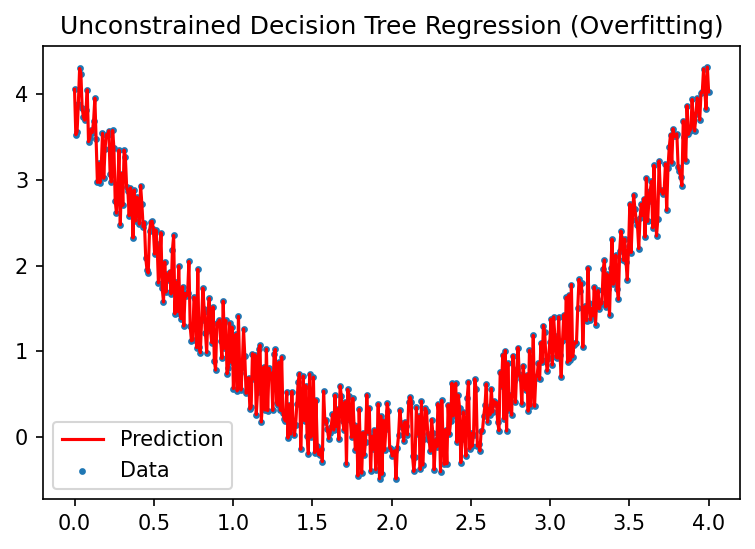

In [ ]:
plt.figure(dpi=150)
plt.scatter(X_train,Y_train,s=5)
plt.plot(X_train,tree_clf_unconstrained_reg_pred,'r')
plt.legend(['Prediction','Data'])
plt.title('Unconstrained Decision Tree Regression (Overfitting)')
plt.show()

#Plotting the values of the model that has overfit